In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Charger les données depuis le fichier CSV
data = pd.read_csv('data/data.csv')
data.head()

,episode,snake_length,steps,total_reward
0,1,2,5,-1
1,2,2,5,-1
2,3,2,5,-1
3,4,2,5,-1
4,5,2,6,-1


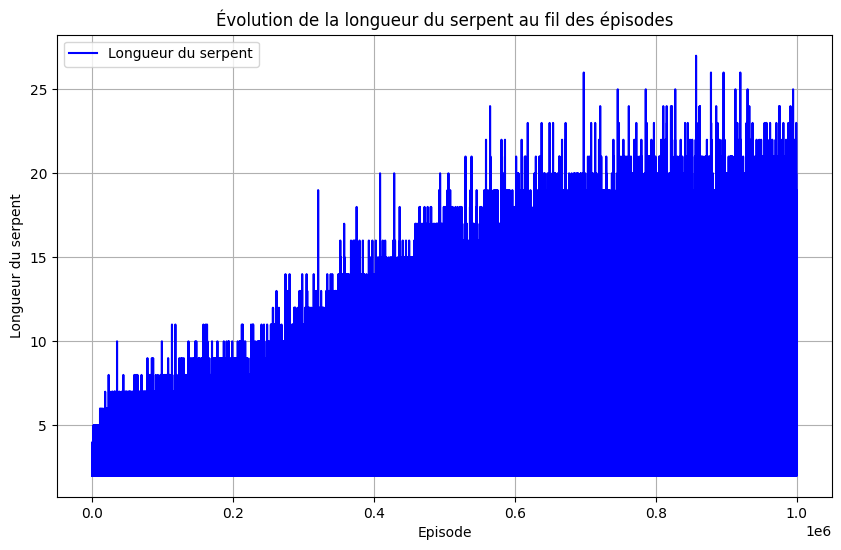

In [3]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(data['episode'], data['snake_length'], color='b', label="Longueur du serpent")

# Ajouter des labels et un titre
plt.xlabel("Episode")
plt.ylabel("Longueur du serpent")
plt.title("Évolution de la longueur du serpent au fil des épisodes")
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


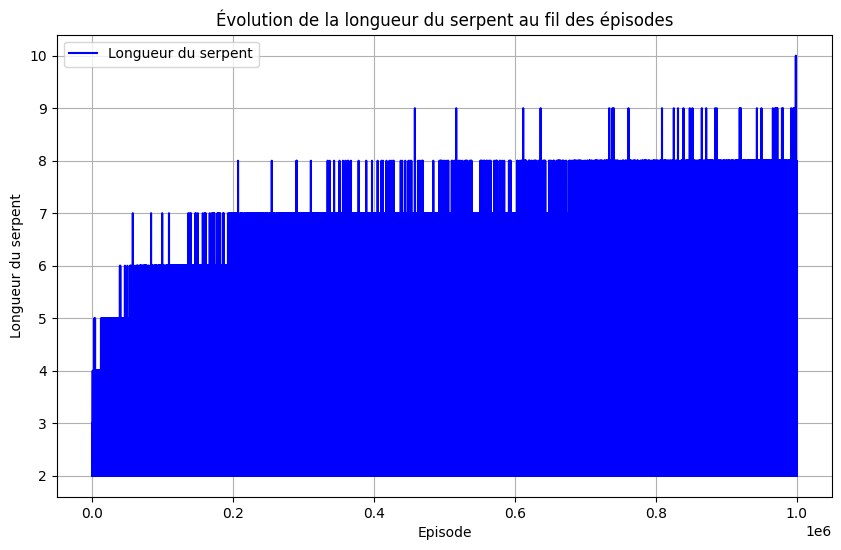

In [4]:
data2 = pd.read_csv('data/10m1k3.csv')

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(data2['episode'], data2['snake_length'], color='b', label="Longueur du serpent")

# Ajouter des labels et un titre
plt.xlabel("Episode")
plt.ylabel("Longueur du serpent")
plt.title("Évolution de la longueur du serpent au fil des épisodes")
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()
